In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
state_number_map = {'failed':0, 'successful':1, 'live':2, 'suspended':3, 'canceled':4, 'undefined':5}

In [19]:
!ls

archive.zip	  Capstone_1.md		ks-projects-201612.csv
Capstone_1.ipynb  Categories_Hbars.png	ks-projects-201801.csv


In [20]:
#early_csv = pd.read_csv('ks-projects-201612.csv',header = 0)
late_csv = pd.read_csv('ks-projects-201801.csv')

In [21]:
late_csv['launched'] = pd.to_datetime(late_csv['launched'])
late_csv['deadline'] = pd.to_datetime(late_csv['deadline'])
set(late_csv['state'].values)
late_csv['state'] = late_csv['state'].map(state_number_map)
lengths = late_csv['deadline'] - late_csv['launched']
late_csv['length'] = lengths

In [22]:
late_csv.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,4,14,US,1283.0,1283.0,19500.00,55 days 15:24:57


In [23]:
late_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   ID                378661 non-null  int64          
 1   name              378657 non-null  object         
 2   category          378661 non-null  object         
 3   main_category     378661 non-null  object         
 4   currency          378661 non-null  object         
 5   deadline          378661 non-null  datetime64[ns] 
 6   goal              378661 non-null  float64        
 7   launched          378661 non-null  datetime64[ns] 
 8   pledged           378661 non-null  float64        
 9   state             378661 non-null  int64          
 10  backers           378661 non-null  int64          
 11  country           378661 non-null  object         
 12  usd pledged       374864 non-null  float64        
 13  usd_pledged_real  378661 non-null  float64  

In [45]:
def make_hist(x):
    fig, ax = plt.subplots()
    return ax.hist(x)

def subtable(category):
    df = late_csv[late_csv['main_category'] == category]
    return df

In [49]:
cats = set(late_csv['main_category'])
sub_cats = set(late_csv['category'])

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,length
33,1000120287,BB130A,Public Art,Art,USD,2013-03-24,25000.0,2013-02-12 01:07:28,1395.0,0,30,US,1395.0,1395.00,25000.0,39 days 22:52:32
38,1000134913,Galaxy: Winnie and Friends,Illustration,Art,USD,2016-01-27,3000.0,2015-12-23 21:47:29,17.0,0,2,US,17.0,17.00,3000.0,34 days 02:12:31
49,1000197321,(In)visible Empire Tees,Public Art,Art,USD,2016-01-02,1200.0,2015-11-22 22:47:44,90.0,0,4,US,90.0,90.00,1200.0,40 days 01:12:16
52,1000202062,SkateFrames-Photo frame made from recycled ska...,Art,Art,USD,2015-05-08,7500.0,2015-04-08 02:53:18,3.0,0,3,US,3.0,3.00,7500.0,29 days 21:06:42
62,1000235465,TO RUSSIA WITH LOVE AND SIMON,Art,Art,USD,2016-06-22,5000.0,2016-05-23 18:10:04,587.0,0,8,US,587.0,587.00,5000.0,29 days 05:49:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378570,999517172,Fathers of cosplay,Public Art,Art,USD,2015-09-17,20000.0,2015-08-18 06:21:46,60.0,0,2,US,60.0,60.00,20000.0,29 days 17:38:14
378574,999548286,Art Culture and development. building an art/m...,Illustration,Art,USD,2015-02-27,20000.0,2015-01-28 03:19:58,3.0,0,3,US,3.0,3.00,20000.0,29 days 20:40:02
378612,999754150,31•13: Thesis Exhibition,Mixed Media,Art,USD,2013-03-20,8000.0,2013-02-18 18:46:29,8935.0,1,121,US,8935.0,8935.00,8000.0,29 days 05:13:31
378630,999829547,PookieCat rune cards - funny oracle cards for ...,Illustration,Art,EUR,2016-06-07,1500.0,2016-05-08 09:33:08,1699.0,1,39,NL,1937.7,1920.56,1695.6,29 days 14:26:52


In [26]:
late_csv.corr()

,ID,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001679,0.000466,0.001433,0.000654,-0.000633,-0.000025,0.001854
goal,0.001679,1.000000,0.007358,0.001122,0.004012,0.005534,0.005104,0.942692
pledged,0.000466,0.007358,1.000000,0.015537,0.717079,0.857370,0.952843,0.005024
state,0.001433,0.001122,0.015537,1.000000,0.015579,0.015611,0.014774,-0.000111
backers,0.000654,0.004012,0.717079,0.015579,1.000000,0.697426,0.752539,0.004517
usd pledged,-0.000633,0.005534,0.857370,0.015611,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,-0.000025,0.005104,0.952843,0.014774,0.752539,0.907743,1.000000,0.005596
usd_goal_real,0.001854,0.942692,0.005024,-0.000111,0.004517,0.006172,0.005596,1.000000


In [27]:
av_pledge = late_csv.groupby('main_category')

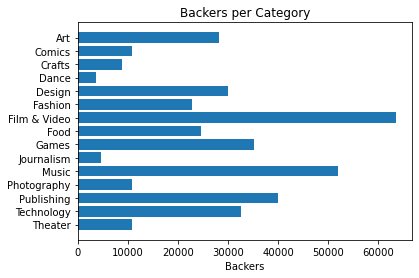

In [28]:
backers_counts = av_pledge['backers'].count()
fig, ax = plt.subplots()
ax.barh(backers_counts.keys(),backers_counts.values)
ax.invert_yaxis()
ax.set_xlabel('Backers')
ax.set_title('Backers per Category')
plt.savefig('Categories_Hbars')

(array([197719.,      0., 133956.,      0.,   2799.,      0.,   1846.,
             0.,  38779.,   3562.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

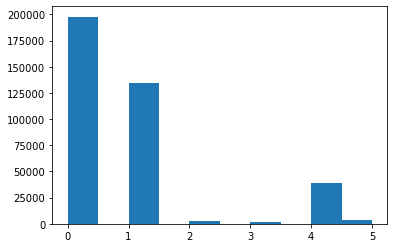

In [29]:
fig, ax = plt.subplots()
ax.hist(late_csv['state'])

In [30]:
f_and_v = subtable('Film & Video')

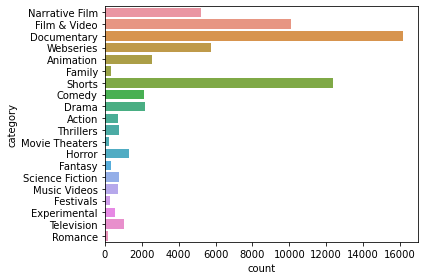

In [66]:
fig, ax = plt.subplots()

#distro = stats.norm.pdf() (f_and_v['usd_goal_real'].mean())

#x = np.arange(start = min(f_and_v['usd_goal_real']), stop = max(f_and_v['usd_goal_real']))

sns.countplot( y = f_and_v['category'])
plt.tight_layout()
plt.savefig('FandVSubcats', transparent = False)

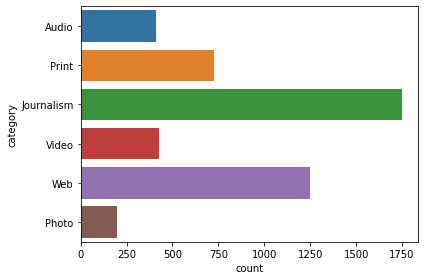

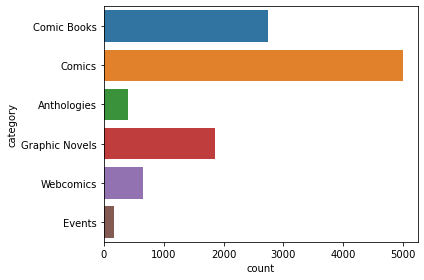

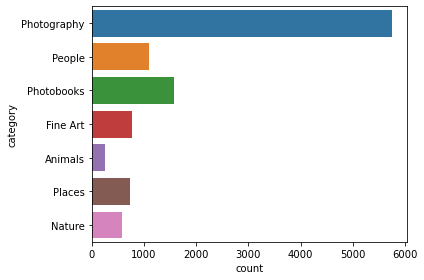

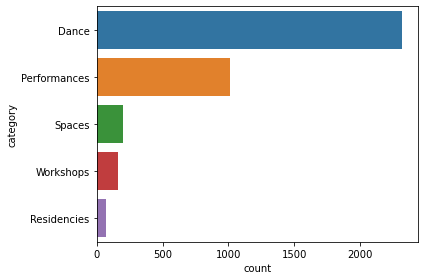

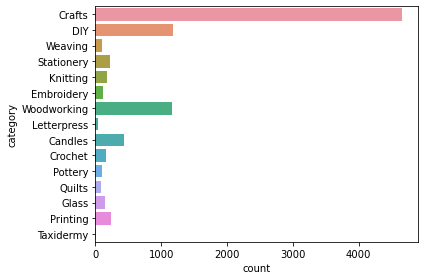

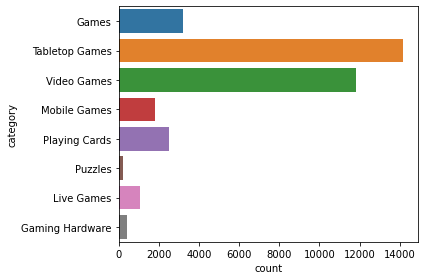

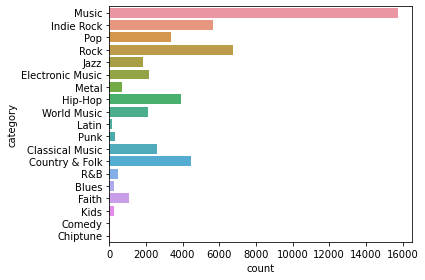

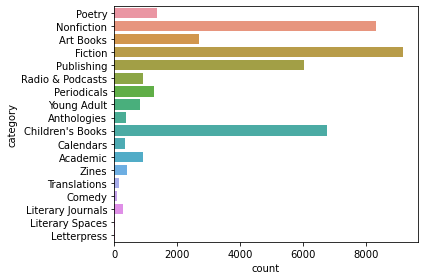

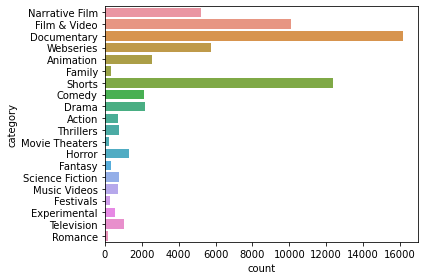

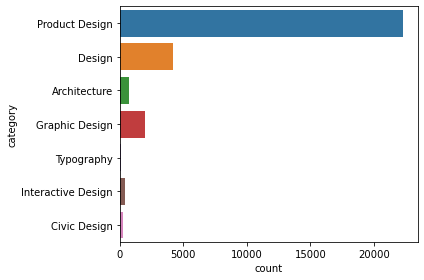

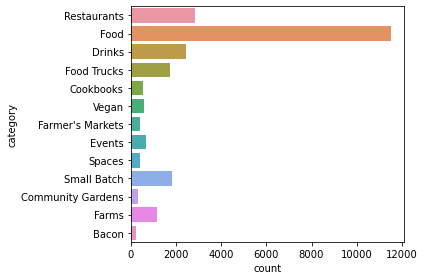

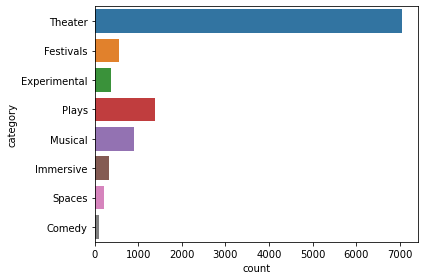

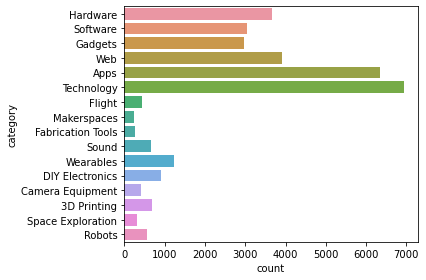

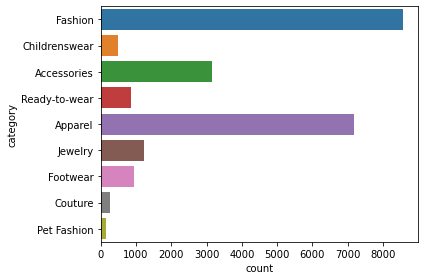

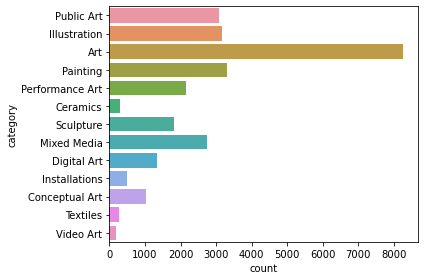

In [71]:
#fig, ax = plt.subplots()
for category in cats:
    fig, ax = plt.subplots()
    table = subtable(category)
    sns.countplot(y=table['category'], label = f'{category}')
    plt.tight_layout()
    plt.savefig(f'{category}', transparent = False, bbox_inches = 'tight')

<AxesSubplot:>

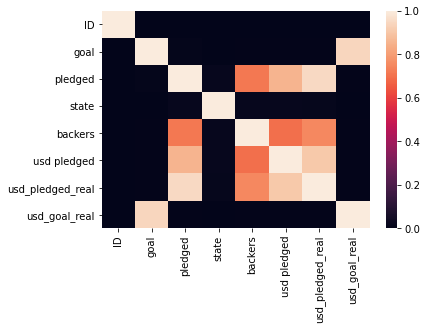

In [64]:
sns.heatmap(late_csv.corr())

In [72]:
sub1 = subtable('Art')